### Question 7.2

##### Using the 20 years of daily high temperature data for Atlanta (July through October) from Question 6.2 (file temps.txt), build and use an exponential smoothing model to help make a judgment of whether the unofficial end of summer has gotten later over the 20 years. (Part of the point of this assignment is for you to think about how you might use exponential smoothing to answer this question. Feel free to combine it with other models if you’d like to. There’s certainly more than one reasonable approach.) 

##### Note: in R, you can use either HoltWinters (simpler to use) or the smooth package’s es function (harder to use, but more general). If you use es, the Holt-Winters model uses model=”AAM” in the function call (the first and second constants are used “A”dditively, and the third (seasonality) is used “M”ultiplicatively; the documentation doesn’t make that clear).

In [1]:
# install.packages("forecast", repos='http://cran.us.r-project.org')
# install.packages("xlsx", repos='http://cran.us.r-project.org')

suppressWarnings(suppressMessages(library("TTR")))
suppressWarnings(suppressMessages(library("forecast")))
# suppressWarnings(suppressMessages(library("xlsx")))

In [2]:
temperature <- read.table("temps.txt", header = T, sep = '\t')
temp_vector <- as.vector(unlist(temperature[,2:21], recursive = TRUE, use.names = TRUE))

# There are 123 days of data. We want frequency of 1 day. So, deltat = 1/123
temp_ts <- ts(temp_vector, start=c(1996,1), end = c(2015,123), deltat = 1/123)

In [10]:
str(temp_ts)

 Time-Series [1:2460] from 1996 to 2016: 98 97 97 90 89 93 93 91 93 93 ...


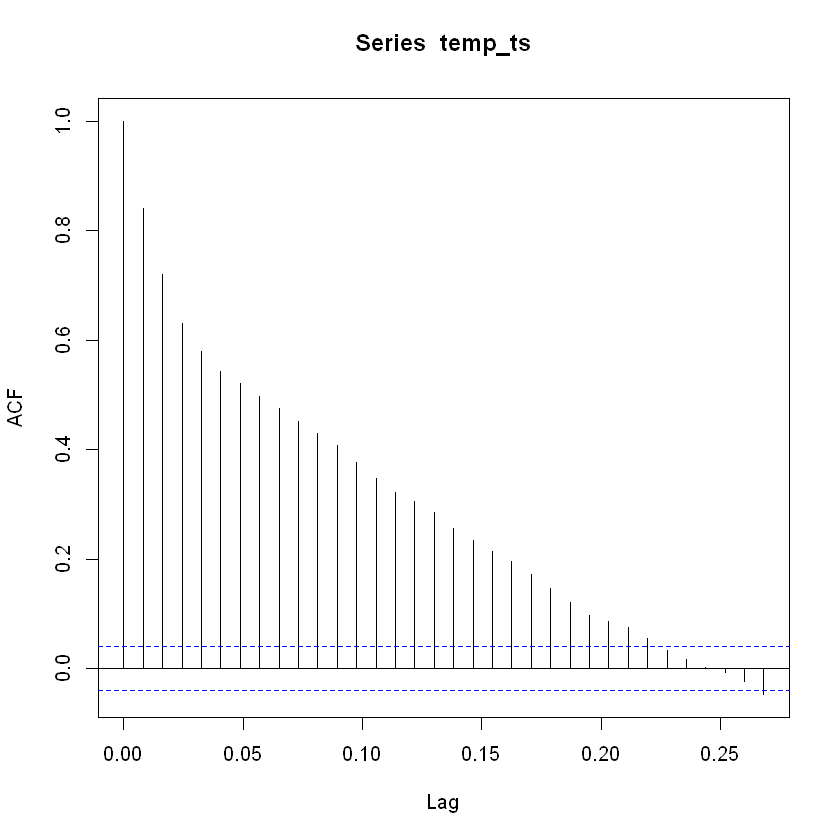

In [8]:
# Auto Correlation plot showing that only one value lying outside the 95% limits and 
# the L-jung box test has a p-value < 2.2e-16

acf(temp_ts, lag.max = NULL, type = "correlation",plot = TRUE)

In [5]:
Box.test(temp_ts, lag = 10, type = "Ljung-Box", fitdf = 0)


	Box-Ljung test

data:  temp_ts
X-squared = 8350.9, df = 10, p-value < 2.2e-16


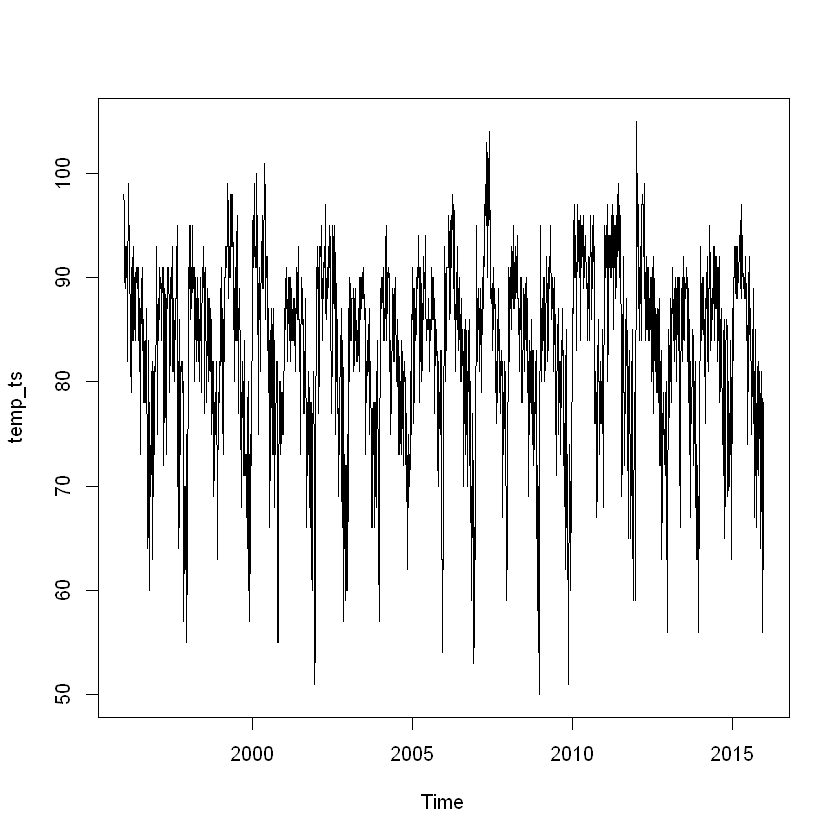

In [11]:
plot.ts(temp_ts)

##### Now I am going to decompose the time series data, separating it into its constituent components, which are trend component and an irregular component, and if it is a seasonal time series, a seasonal component.

Time Series:
Start = c(1996, 1) 
End = c(2015, 123) 
Frequency = 123 
   [1]   5.0322211   4.5555416   4.6008989   4.9158326   4.8597778   4.2281989
   [7]   3.4404368   5.7053063   6.5495511   4.9723153   4.4982032   4.6560979
  [13]   3.5551137   4.6090290   3.9256743   4.6124522   5.5084727   5.6133080
  [19]   6.7690632   5.5551137   6.5508348   5.8144205   5.6060337   5.5546858
  [25]   4.8747543   6.4622597   6.6257171   7.2080876   5.8922982   6.1533166
  [31]   4.8811728   5.3527175   5.2500217   6.5208818   6.9419345   7.7284128
  [37]   6.1443307   5.5037659   5.6599490   5.6026105   5.9188279   5.9171163
  [43]   4.6509631   4.9633294   5.0690205   4.5953362   5.3860936   5.6017547
  [49]   6.7596495   6.9697479   5.9684642   5.7065900   5.9706037   4.9128373
  [55]   4.3326063   3.2808305   5.1263589   4.4502785   3.8726148   4.9830128
  [61]   2.5670949   2.5606764   1.8221227   1.6685070   2.4130513   2.1520329
  [67]   2.8383829   1.2632866   1.4224650   2.0018403   1.63

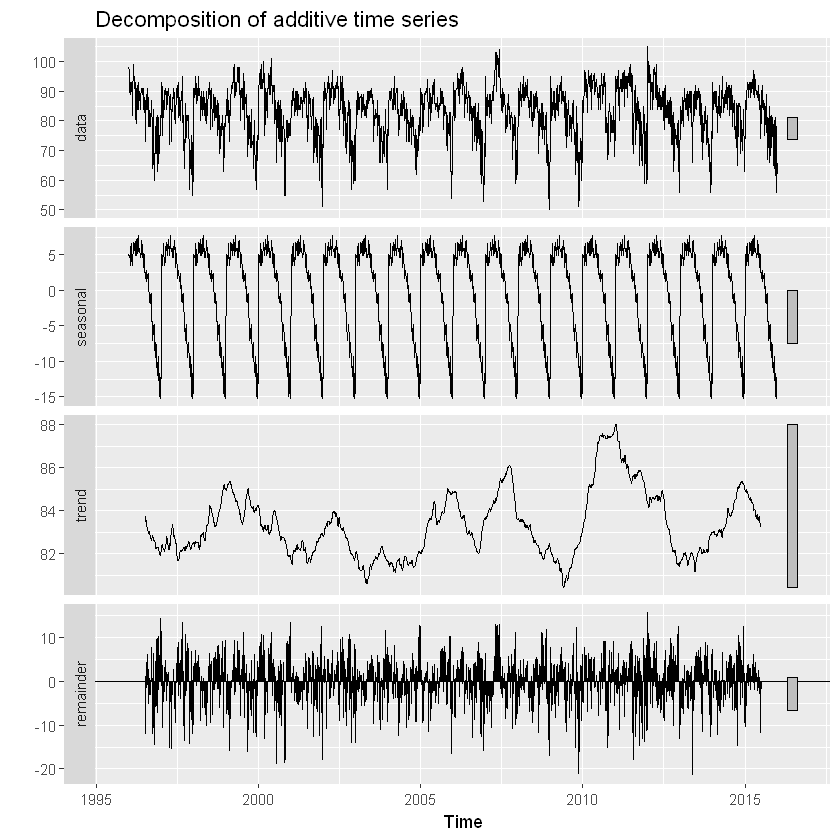

In [12]:
temp_components <- decompose(temp_ts)
temp_components$seasonal
autoplot(temp_components)

##### Now, I am going to perform single exponential smoothing. Here, I'm using a model with no trend and seasonality. I am going to let R determine the value of alpha.##### 

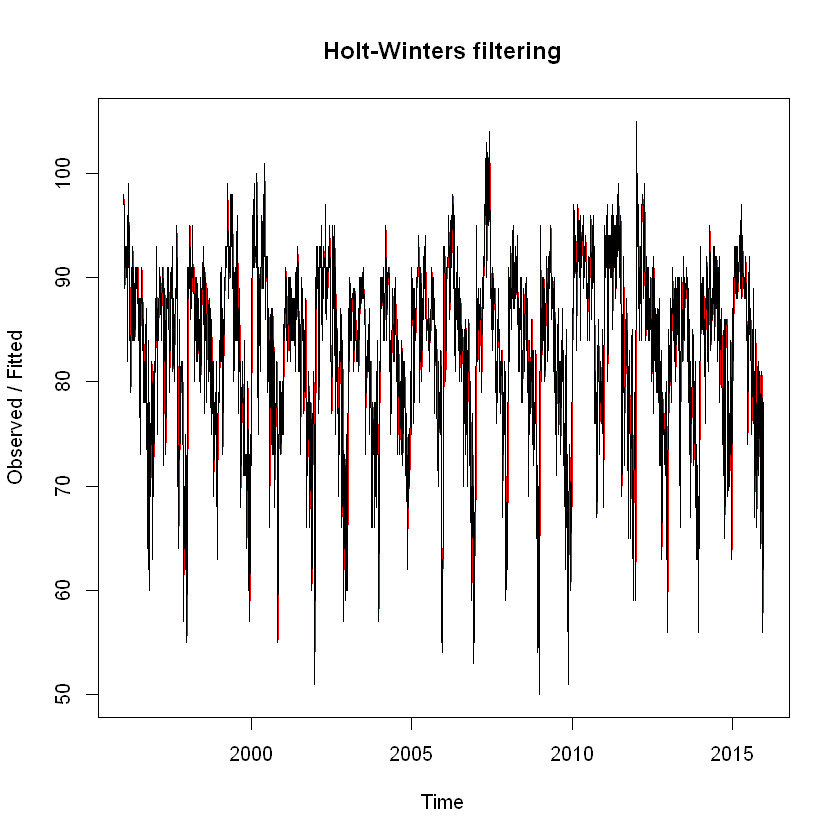

In [15]:
temp_single_es <- HoltWinters(temp_ts, beta = FALSE, gamma = FALSE)
plot(temp_single_es)

In [16]:
temp_single_es
temp_single_es$SSE

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = temp_ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.8388021
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 63.30952

[1] 56198.1

##### The estimated value of alpha is 0.8388021. This is high valueindicating that the estimate of the current value of the levelis based mostly upon very recent observations in the time series. The value of the SSE for the in-sample forecast errors is 56198.0955314733.

##### I am going to perform double exponential smoothing (gamma = FALSE). I am going to let R determine the value of alpha.

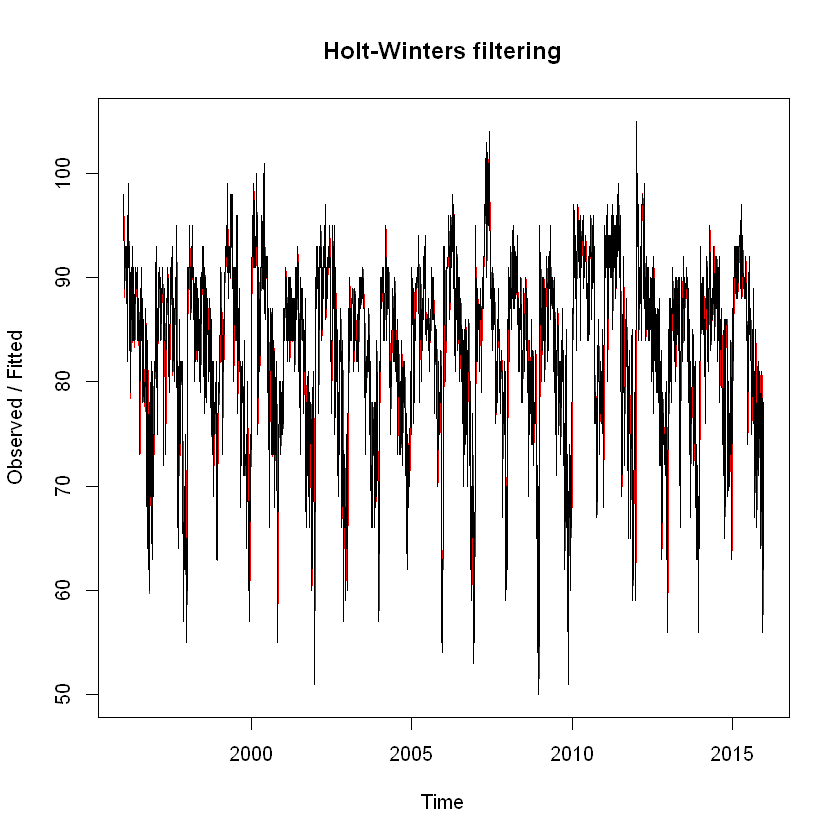

In [18]:
temp_double_es <- HoltWinters(temp_ts, gamma = FALSE)
plot(temp_double_es)

In [19]:
temp_double_es
temp_double_es$SSE

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = temp_ts, gamma = FALSE)

Smoothing parameters:
 alpha: 0.8445729
 beta : 0.003720884
 gamma: FALSE

Coefficients:
        [,1]
a 63.2530022
b -0.0729933

[1] 56572.54

##### The estimated value of alpha is 0.8388021. Beta is 0.0037. This means that the trend value from the recent observations has relatively very little weight when forecasting for future values. The value of the sum-of-squared-errors for the in-sample forecast errors is 56572.537568114.

##### Next, I am going to check if the data can be described using an additive model. I am going to use Holt-Winters triple exponential smoothing to estimate the level (alpha), slope (beta) and seasonal (gamma) components.

In [20]:
temp_add_hw <- HoltWinters(temp_ts)
temp_add_hw
temp_add_hw$SSE

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = temp_ts)

Smoothing parameters:
 alpha: 0.6610618
 beta : 0
 gamma: 0.6248076

Coefficients:
              [,1]
a     71.477236414
b     -0.004362918
s1    18.590169842
s2    17.803098732
s3    12.204442890
s4    13.233948865
s5    12.957258705
s6    11.525341233
s7    10.854441534
s8    10.199632666
s9     8.694767348
s10    5.983076192
s11    3.123493477
s12    4.698228193
s13    2.730023168
s14    2.995935818
s15    1.714600919
s16    2.486701224
s17    6.382595268
s18    5.081837636
s19    7.571432660
s20    6.165047647
s21    9.560458487
s22    9.700133847
s23    8.808383245
s24    8.505505527
s25    7.406809208
s26    6.839204571
s27    6.368261304
s28    6.382080380
s29    4.552058253
s30    6.877476437
s31    4.823330209
s32    4.931885957
s33    7.109879628
s34    6.178469084
s35    4.886891317
s36    3.890547248
s37    2.148316257
s38    2.524866001
s39    3.008098232
s40    

[1] 66244.25

##### The value of beta is zero, suggesting no trend from recent observations on forecasting future values. The level parameter is 0.6610618, and the seasonal smoothing parameter, gamma is 0.6248076. SSE is 66244.2504058466.

##### The forecasts made by HoltWinters function are stored in a named element of this list variable called fitted.

xhat,level,trend,season
87.17619,82.87739,-0.004362918,4.303159
90.32925,82.09550,-0.004362918,8.238119
92.96089,81.87348,-0.004362918,11.091777
90.93360,81.89497,-0.004362918,9.042997
83.99752,81.93450,-0.004362918,2.067387
84.04358,81.93177,-0.004362918,2.116168
75.06732,81.89860,-0.004362918,-6.826922
87.04284,81.84974,-0.004362918,5.197468
84.01829,81.81705,-0.004362918,2.205599
87.05875,81.80060,-0.004362918,5.262509


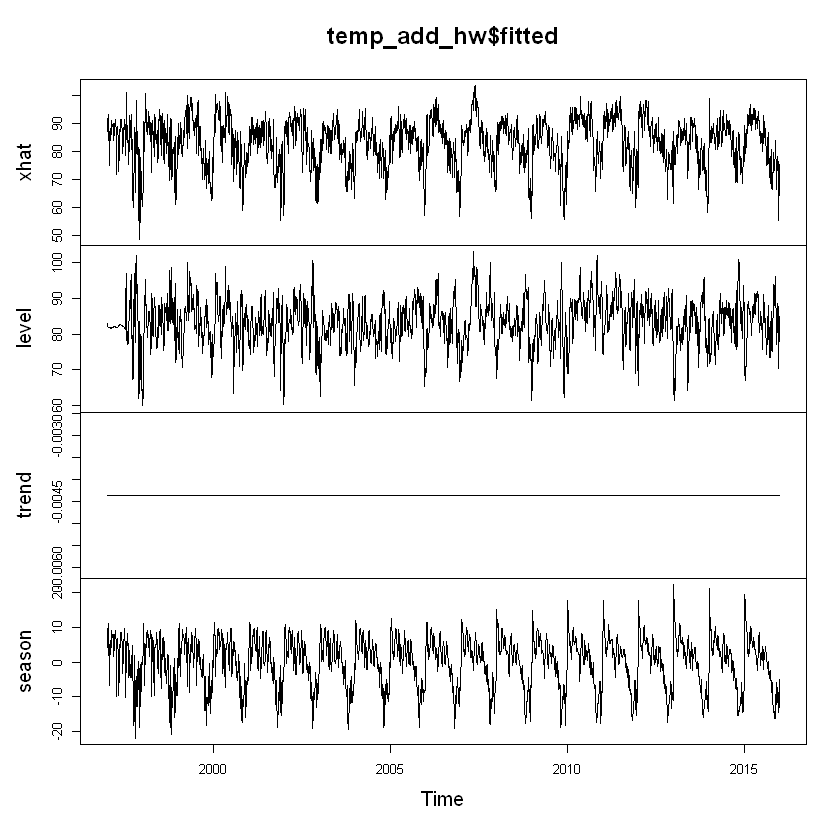

In [23]:
temp_add_hw$fitted
plot(temp_add_hw$fitted)

##### I am going to check if the data can be described using an multiplicative model. I am going to use Holt-Winters triple exponential smoothing to estimate the level (alpha), slope (beta) and seasonal (gamma) components.

In [10]:
temp_mul_hw <- HoltWinters(temp_ts, seasonal = "multiplicative")
temp_mul_hw
temp_mul_hw$SSE

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = temp_ts, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.615003
 beta : 0
 gamma: 0.5495256

Coefficients:
             [,1]
a    73.679517064
b    -0.004362918
s1    1.239022317
s2    1.234344062
s3    1.159509551
s4    1.175247483
s5    1.171344196
s6    1.151038408
s7    1.139383104
s8    1.130484528
s9    1.110487514
s10   1.076242879
s11   1.041044609
s12   1.058139281
s13   1.032496529
s14   1.036257448
s15   1.019348815
s16   1.026754142
s17   1.071170378
s18   1.054819556
s19   1.084397734
s20   1.064605879
s21   1.109827336
s22   1.112670130
s23   1.103970506
s24   1.102771209
s25   1.091264692
s26   1.084518342
s27   1.077914660
s28   1.077696145
s29   1.053788854
s30   1.079454300
s31   1.053481186
s32   1.054023885
s33   1.078221405
s34   1.070145761
s35   1.054891375
s36   1.044587771
s37   1.023285461
s38   1.025836722
s39   1.031075732
s40   1.0314191

[1] 68904.57

##### Again, the value of beta is zero, suggesting no trend from recent observations on forecasting future values. The level parameter is 0.615003, and the seasonal smoothing parameter, gamma is 0.5495256. SSE is 68904.5693317479.

#### I am going to write the fitted values to a csv file to perform CUSUM approach to detect unofficial end of summer.

In [11]:
df_temp1 <- matrix(temp_mul_hw$fitted[,4], nrow = 123)

In [13]:
write.csv(df_temp1, file = 'df_temp1.csv')

In [23]:
length(temp_mul_hw$fitted[,4])/123

[1] 19

### Next, I am going to try to predict the temperatures for July 1 through Oct 31 for 2016 and 2017 using the Holt-Winters mulultiplicative model. To do this, I am using the predict() function that inputs the HW object, prediction interval, number of predictions, and confidence level.  

In [14]:
predicted_temp <- predict(temp_mul_hw, n.ahead = 123*2, prediction.interval = FALSE, level = 0.95)

In [15]:
new_df <- t(as.data.frame(matrix(round(predicted_temp),ncol =123,byrow = T)))

In [16]:
names(new_df) <- c('X2016', 'X2017')

In [17]:
temperature_data <- cbind(temperature, new_df)

In [18]:
names(temperature_data) <- c('DAY','X1996','X1997','X1998','X1999','X2000','X2001','X2002','X2003','X2004','X2005','X2006','X2007','X2008','X2009','X2010','X2011','X2012','X2013','X2014','X2015','X2016','X2017')

In [19]:
head(temperature_data)

,DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017
V1,1-Jul,98,86,91,84,89,84,90,73,82,...,85,95,87,92,105,82,90,85,91,91
V2,2-Jul,97,90,88,82,91,87,90,81,81,...,87,90,84,94,93,85,93,87,91,90
V3,3-Jul,97,93,91,87,93,87,87,87,86,...,91,89,83,95,99,76,87,79,85,85
V4,4-Jul,90,91,91,88,95,84,89,86,88,...,90,91,85,92,98,77,84,85,87,86
V5,5-Jul,89,84,91,90,96,86,93,80,90,...,88,80,88,90,100,83,86,84,86,86
V6,6-Jul,93,84,89,91,96,87,93,84,90,...,82,87,89,90,98,83,87,84,85,84


In [20]:
tail(temperature_data)

,DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017
V118,26-Oct,75,71,79,69,75,64,68,68,79,...,70,65,85,77,80,61,84,67,62,62
V119,27-Oct,75,57,79,75,78,51,69,64,81,...,59,60,76,79,70,69,84,56,60,59
V120,28-Oct,81,55,79,73,80,55,75,57,78,...,50,71,74,74,56,64,77,78,62,62
V121,29-Oct,82,64,78,72,75,63,75,70,75,...,59,75,68,59,56,75,73,70,60,60
V122,30-Oct,82,66,82,75,77,72,68,77,78,...,65,66,71,61,56,78,68,70,62,62
V123,31-Oct,81,60,79,75,78,71,60,75,82,...,67,69,75,65,65,74,63,62,64,63


### In this problem, I have used Holt Winters approach to exponentially smoothe data, and use the smoothed data to predict unofficial end of summer using CUSUM approach. 

### In addition, I have also used the smoothed data to predict temperatures of each day (July1 to Oct 31) for the next two years. 

In [1]:
temperature_data

ERROR: Error in eval(expr, envir, enclos): object 'temperature_data' not found
